# Object Detection For Autonomous Driving

## Objective

The goal of this assignment is to fine-tune the YOLO object detection model on a subset of the KITTI dataset, widely used in autonomous driving research. The KITTI dataset provides annotated images for tasks like object detection, tracking, and segmentation, making it ideal for training models to detect objects such as cars, pedestrians, and cyclists.

By completing this assignment, you will gain hands-on experience in dataset preparation, annotation conversion, model training, and performance evaluation using metrics like mAP (mean Average Precision). Additionally, you will explore the trade-offs between speed and accuracy, crucial for real-time applications like autonomous driving.


## Introduction: Object Detection

Object detection is a fundamental task in computer vision that involves identifying and localizing objects within an image or video.

The main techniques for object detection include traditional methods like sliding window and region-based approaches, as well as modern deep learning-based methods such as YOLO (You Only Look Once), SSD (Single Shot MultiBox Detector), and Faster R-CNN. These techniques leverage convolutional neural networks (CNNs) to extract features and predict bounding boxes and class labels for objects in real-time or near real-time.

Widely used models for object detection include:
- **YOLO (You Only Look Once)**: Known for its speed and efficiency in real-time applications.
- **Faster R-CNN**: A two-stage detector that provides high accuracy but is slower compared to single-stage detectors.
- **SSD (Single Shot MultiBox Detector)**: Balances speed and accuracy, making it suitable for various applications.
- **RetinaNet**: Introduces the focal loss to address class imbalance in object detection.
- **EfficientDet**: A family of models that optimize both accuracy and efficiency using compound scaling.

In the context of autonomous vehicles, object detection plays a critical role in perceiving the environment, identifying obstacles, pedestrians, traffic signs, and other vehicles. This capability enables autonomous systems to make informed decisions, ensuring safety and efficiency in navigation and driving scenarios.

## YOLO

YOLO (You Only Look Once) is a state-of-the-art, real-time object detection system. Unlike traditional object detection methods that apply a classifier to different regions of an image, YOLO frames object detection as a single regression problem. It predicts bounding boxes and class probabilities directly from full images in one evaluation, making it extremely fast and efficient.

### Model

The YOLO model divides the input image into a grid, where each grid cell is responsible for predicting bounding boxes and their associated class probabilities. Key features of YOLO include:

- **Unified Architecture**: YOLO uses a single convolutional neural network (CNN) to predict multiple bounding boxes and class probabilities simultaneously.
- **Speed**: YOLO is optimized for real-time applications, capable of processing images at high frame rates.
- **Global Context**: By considering the entire image during training and inference, YOLO reduces false positives and improves detection accuracy.
- **Versions**: Over time, YOLO has evolved through multiple versions (e.g., YOLOv1 up to YOLOv11), each introducing architectural improvements, better loss functions, and enhanced performance.

YOLO is widely used in applications such as autonomous driving, surveillance, and robotics, where real-time object detection is critical.

For more details on YOLO, visit the [Ultralytics GitHub repository](https://github.com/ultralytics/ultralytics).

## Theory Questions


For the next questions, focus on the latest version of the model, YOLOv11

Briefly describe the architecture used in YOLOv11 and the different losses used during training.

ANS: According to [this paper](https://arxiv.org/html/2410.17725v1?utm_source=chatgpt.com), YOLO consists of 3 fundamental components: the backbone, the neck and the head. The backbone serves as a primary feature extractor utilizing conventional neural networks. The neck is an intermediate steps used to process the information by aggregating and enhancing feature representation. Finally, the head functions as a prediction mechanism to generate the final output for classification and localization.

The improvement brought by YOLOv11 are:
- C3K2 Block: Employs two small convolutions instead of a large one to improve the process time while maintaining performance
- Spatial Pyramid Pooling (SPPF): Accelerates the spatial pyramid pooling process, enabling the model to capture multi-scale features more effectively without a significant increase in computational overhead.
- Convolutional Block with Parallel Spatial Attention (C2PSA): By integrating parallel spatial attention mechanisms, the C2PSA block enhances the model's ability to focus on relevant regions within an image, thereby improving detection accuracy.

For training, it uses multiple loss functions:
- Box Loss for precise localization,
- Classification Loss for accurate object labeling,
- Distribution Focal Loss (DFL) to handle class imbalance.

What are the metrics used to assess YOLO's performance for object detection?

ANS: The performance of YOLO for object detection is typically assessed using the following key metrics:
- Mean Average Precision (mAP): Measures detection accuracy by computing the area under the precision-recall curve. Common versions include mAP@0.5 (IoU ≥ 0.5) and mAP@0.5:0.95 (averaged over multiple IoU thresholds).
- Intersection over Union (IoU): Evaluates the overlap between predicted and ground truth bounding boxes.
- Precision: The proportion of correctly identified objects among all detected objects.
- Recall: The proportion of correctly detected objects out of all actual objects.
- Frames Per Second (FPS): Measures inference speed to assess real-time performance.
- F1 Score: The harmonic mean of precision and recall, balancing false positives and false negatives.

## Code

In the next part of the assignment, you will load a YOLO model and fine-tune it on the provided subset of the KITTI dataset.
You will then visualize the training losses and evaluate the model by running inference to assess its performance.

In [1]:
!pip install ultralytics opencv-python-headless -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00


In [2]:
import os, cv2, glob, random, shutil, requests, zipfile
from ultralytics import YOLO

import matplotlib.pyplot as plt
import pandas as pd
import os

%matplotlib inline

from IPython.display import Image, display
import glob

import yaml
import cv2
import matplotlib.pyplot as plt
import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:


# ---------------------------------------------
# STEP 1: Setup paths
# ---------------------------------------------
HOME = os.getcwd()
DATASET_PATH = os.path.join(HOME, "datasets", "kitti_subset")
IMAGES_PATH = os.path.join(DATASET_PATH, "images")
LABELS_PATH = os.path.join(DATASET_PATH, "labels")

TRAIN_IMG = os.path.join(IMAGES_PATH, "train")
VAL_IMG = os.path.join(IMAGES_PATH, "val")
TEST_IMG = os.path.join(IMAGES_PATH, "test")
TRAIN_LABEL = os.path.join(LABELS_PATH, "train")
VAL_LABEL = os.path.join(LABELS_PATH, "val")
TEST_LABEL = os.path.join(LABELS_PATH, "test")

for path in [TRAIN_IMG, VAL_IMG, TEST_IMG, TRAIN_LABEL, VAL_LABEL, TEST_LABEL]:
    os.makedirs(path, exist_ok=True)

# ---------------------------------------------
# STEP 2: Download and extract KITTI data
# ---------------------------------------------
KITTI_URL = "https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip"
KITTI_LABELS_URL = "https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_label_2.zip"

def download_and_extract(url, extract_to):
    zip_path = os.path.join(HOME, url.split("/")[-1])
    if not os.path.exists(zip_path):
        print(f"Downloading {url}...")
        response = requests.get(url, stream=True)
        with open(zip_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    file.write(chunk)
        print("Download complete.")

    print(f"Extracting {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("Extraction complete.")

download_and_extract(KITTI_URL, IMAGES_PATH)
download_and_extract(KITTI_LABELS_URL, LABELS_PATH)

# ---------------------------------------------
# STEP 3: Convert KITTI annotations to YOLO
# ---------------------------------------------
CLASS_MAP = {"Car": 0, "Pedestrian": 1, "Cyclist": 2}

def convert_kitti_to_yolo(kitti_label_path, yolo_label_path, image_path):
    with open(kitti_label_path, "r") as file:
        lines = file.readlines()

    img = cv2.imread(image_path)
    if img is None:
        return
    height, width, _ = img.shape

    with open(yolo_label_path, "w") as yolo_file:
        for line in lines:
            elements = line.split()
            class_name = elements[0]
            if class_name not in CLASS_MAP:
                continue  # Skip irrelevant classes

            class_id = CLASS_MAP[class_name]
            x1, y1, x2, y2 = map(float, elements[4:8])

            # Convert to YOLO format
            center_x = ((x1 + x2) / 2) / width
            center_y = ((y1 + y2) / 2) / height
            bbox_width = (x2 - x1) / width
            bbox_height = (y2 - y1) / height

            yolo_file.write(f"{class_id} {center_x:.6f} {center_y:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# ---------------------------------------------
# STEP 4: Prepare dataset (subset, split, convert)
# ---------------------------------------------
all_images = sorted(glob.glob(os.path.join(IMAGES_PATH, "training", "image_2", "*.png")))
all_labels = sorted(glob.glob(os.path.join(LABELS_PATH, "training", "label_2", "*.txt")))

paired_data = list(zip(all_images, all_labels))
random.seed(42)
random.shuffle(paired_data)

# Keep small subset (e.g., 300 images total)
subset_data = paired_data[:300]
train_size = int(0.8 * len(subset_data))
val_size = int(0.1 * len(subset_data))

train_data = subset_data[:train_size]
val_data = subset_data[train_size:train_size + val_size]
test_data = subset_data[train_size + val_size:]

def move_and_convert_files(data, img_dest, lbl_dest):
    for img_path, lbl_path in data:
        new_img_path = os.path.join(img_dest, os.path.basename(img_path))
        new_lbl_path = os.path.join(lbl_dest, os.path.basename(lbl_path))
        shutil.copy2(img_path, new_img_path)
        convert_kitti_to_yolo(lbl_path, new_lbl_path, new_img_path)

move_and_convert_files(train_data, TRAIN_IMG, TRAIN_LABEL)
move_and_convert_files(val_data, VAL_IMG, VAL_LABEL)
move_and_convert_files(test_data, TEST_IMG, TEST_LABEL)


# ---------------------------------------------
# STEP 5: Create data.yaml
# ---------------------------------------------
data_yaml = f"""
path: {DATASET_PATH}
train: images/train
val: images/val
test: images/test

nc: 3
names: ['Car', 'Pedestrian', 'Cyclist']
"""

with open(os.path.join(DATASET_PATH, "data.yaml"), "w") as f:
    f.write(data_yaml)



Download complete.
Extracting /content/data_object_image_2.zip...
Extraction complete.
Download complete.
Extracting /content/data_object_label_2.zip...
Extraction complete.


In [ ]:
# ---------------------------------------------
# STEP 6: Fine-tune YOLOv11 model
# ---------------------------------------------
#TO-DO: Add the code to fine-tune the YOLOv5 model
import os
model = YOLO("yolo11n.yaml")

data_path = os.path.join(DATASET_PATH, "data.yaml")

# Tune for 5 epochs to choose the best hyper parameters
model.tune(data=data_path, epochs=5)

In [ ]:
results = model.train(
    data=data_path,
    epochs=100,
    batch=16,
)

# Inference

After training, visualize the losses andmetrics calculated on the validation set during training.

Additionally, make sure you visualize the confusion matrix to see per-class errors.

For qualitative analysis, run inference on the model, visualise the bouding boxes and visually assess it.

In [22]:
# Validate the model
val = model.val()

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/datasets/kitti_subset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]


                   all         30        128       0.85      0.311      0.516      0.281
                   Car         26        108      0.784       0.62      0.724      0.413
            Pedestrian          7         16      0.766      0.312      0.397      0.224
               Cyclist          3          4          1          0      0.427      0.205
Speed: 2.6ms preprocess, 6.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train5


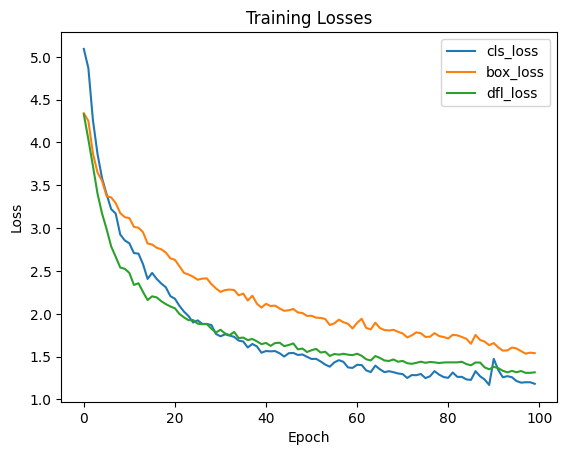

Metrics:
Precision		 [    0.78396     0.76577           1]
Recall			 [    0.62037      0.3125           0]
F1 Score		 [    0.69264     0.44386           0]
mAP (m)			 0.2808217063496497
mAP (0.5)		 0.5163747896292463
mAP (0.5:0.95)	 0.264373805633535
Model Fitness	 0.30437701467760936


In [50]:
# -------- VISUALIZE TRAINING LOSSES AND METRICS --------
#TO-DO: Add the code to visualize the training losses and metrics
cls_loss_idx=3
box_loss_idx=2
dfl_loss_idx=4
with open(os.path.join(HOME, "runs", "detect", "train", "results.csv"), "r") as f:
    cls_loss = []
    box_loss = []
    dfl_loss = []
    for line in f.readlines()[1:]:
        vals = line.split(",")
        cls_loss.append(float(vals[cls_loss_idx]))
        box_loss.append(float(vals[box_loss_idx]))
        dfl_loss.append(float(vals[dfl_loss_idx]))

    plt.plot(cls_loss, label="cls_loss")
    plt.plot(box_loss, label="box_loss")
    plt.plot(dfl_loss, label="dfl_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Losses")
    plt.legend()
    plt.show()

# Print metrics
print("Metrics:")
print("Precision\t\t", val.box.p)
print("Recall\t\t\t", val.box.r)
print("F1 Score\t\t", val.box.f1)
print("mAP (m)\t\t\t", val.box.map)
print("mAP (0.5)\t\t", val.box.map50)
print("mAP (0.5:0.95)\t", val.box.map75)
print("Model Fitness\t", val.box.fitness())

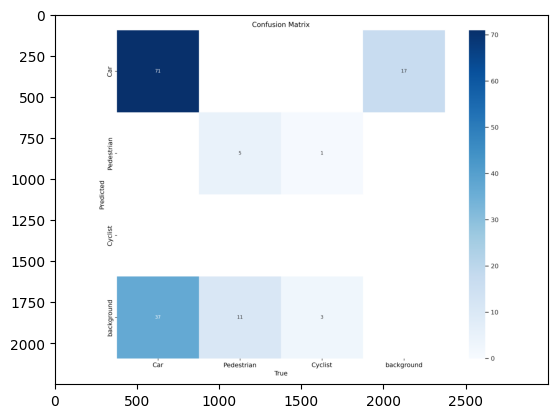

In [52]:
# ------ VISUALIZE CONFUSION MATRIX --------
#TO-DO: Add the code to visualize the confusion matrix
plt.imshow(plt.imread(os.path.join(HOME, "runs", "detect", "train", "confusion_matrix.png")))
plt.show()


0: 640x640 5 Cars, 4.4ms
1: 640x640 1 Car, 4.4ms
2: 640x640 1 Car, 4.4ms
3: 640x640 1 Car, 6 Pedestrians, 4.4ms
4: 640x640 4 Cars, 1 Pedestrian, 4.4ms
5: 640x640 5 Cars, 4.4ms
6: 640x640 1 Car, 3 Pedestrians, 4.4ms
7: 640x640 1 Car, 4.4ms
8: 640x640 3 Cars, 4.4ms
9: 640x640 7 Cars, 4.4ms
10: 640x640 1 Car, 4.4ms
11: 640x640 1 Car, 4.4ms
12: 640x640 7 Cars, 4.4ms
13: 640x640 6 Cars, 4.4ms
14: 640x640 9 Cars, 4.4ms
15: 640x640 3 Cars, 4.4ms
16: 640x640 2 Cars, 4.4ms
17: 640x640 1 Car, 4.4ms
18: 640x640 2 Cars, 4.4ms
19: 640x640 2 Cars, 4.4ms
20: 640x640 4 Cars, 4.4ms
21: 640x640 4 Cars, 4.4ms
22: 640x640 1 Car, 4.4ms
23: 640x640 3 Pedestrians, 4.4ms
24: 640x640 10 Cars, 4.4ms
25: 640x640 4 Cars, 4.4ms
26: 640x640 6 Pedestrians, 4.4ms
27: 640x640 7 Cars, 4.4ms
28: 640x640 6 Cars, 4.4ms
29: 640x640 14 Cars, 4.4ms
Speed: 2.7ms preprocess, 4.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


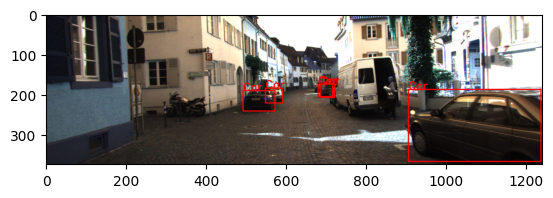

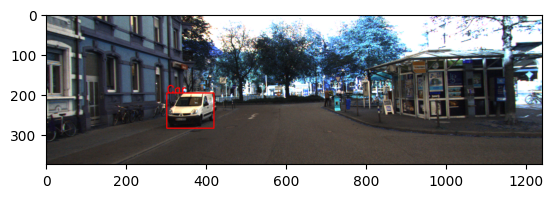

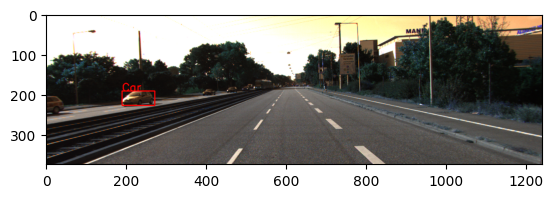

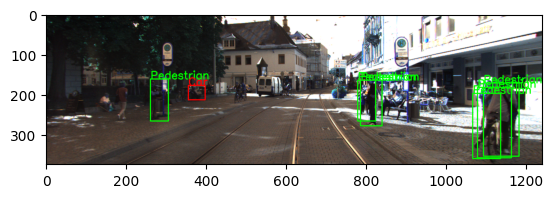

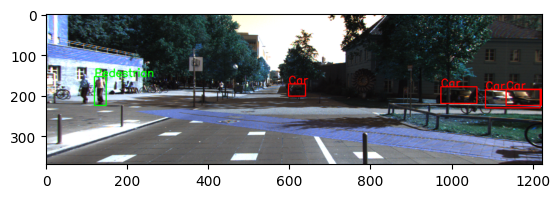

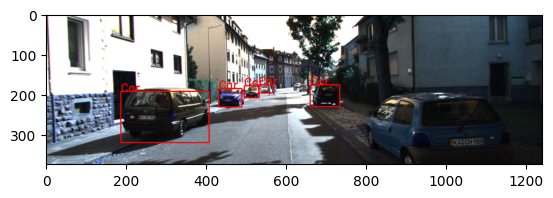

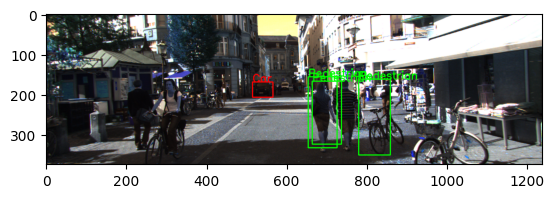

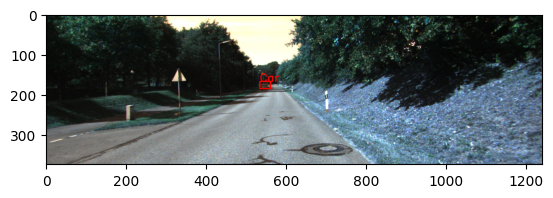

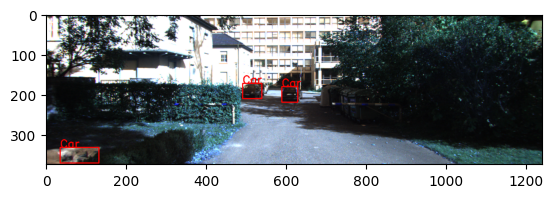

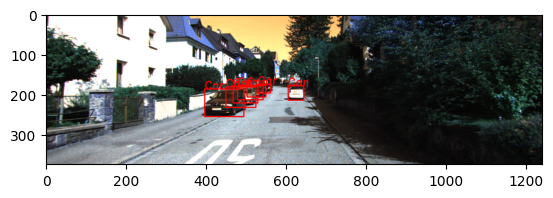

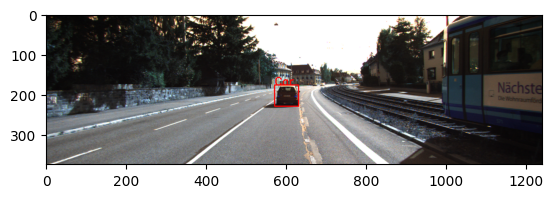

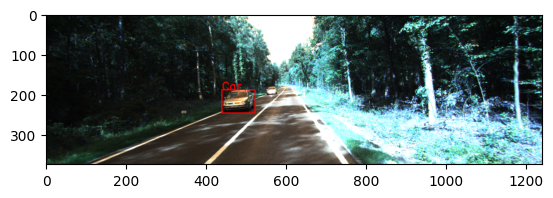

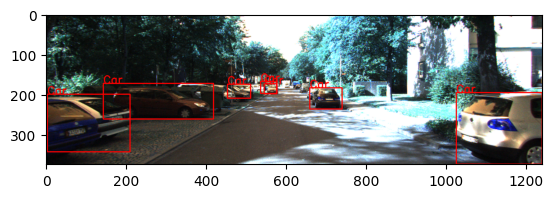

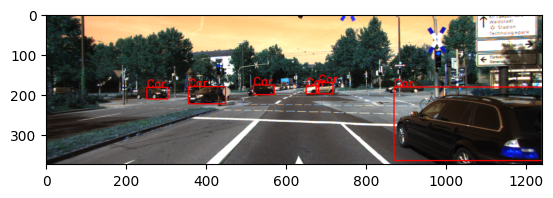

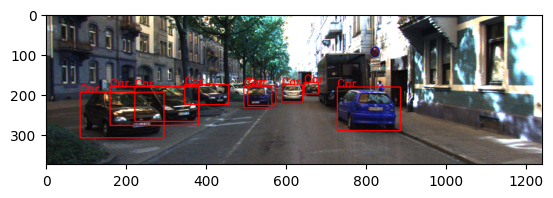

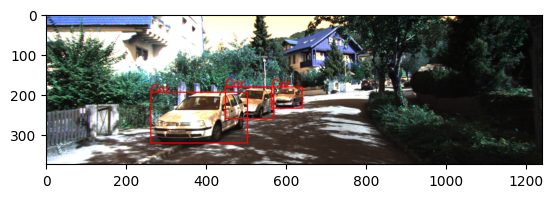

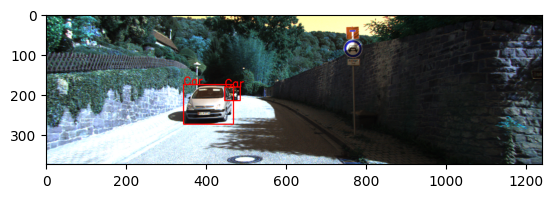

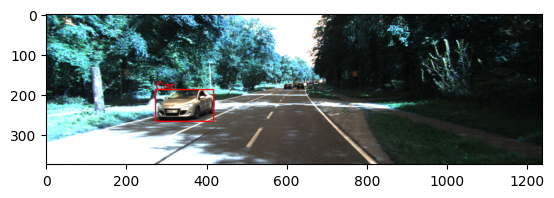

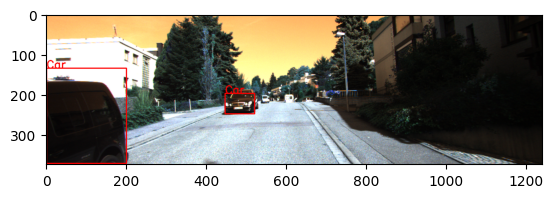

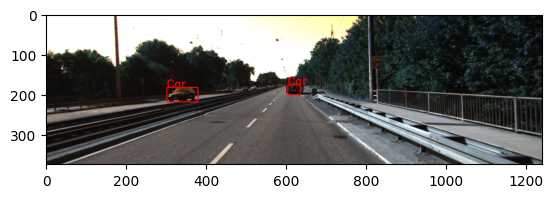

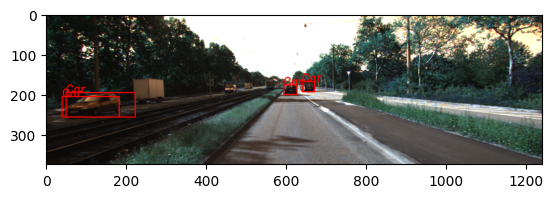

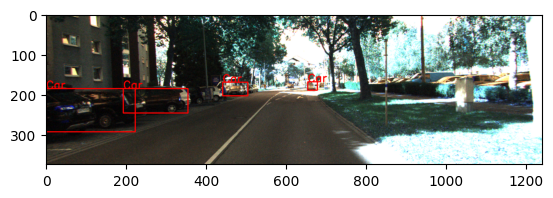

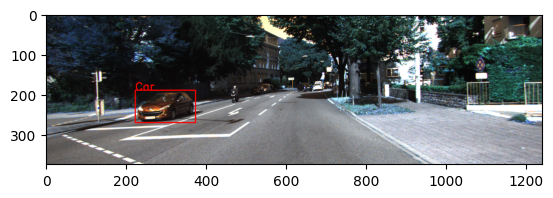

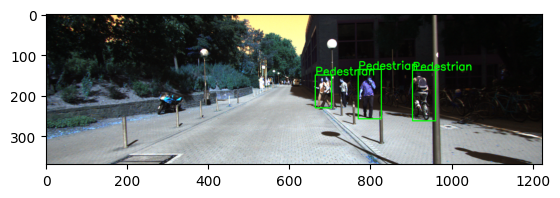

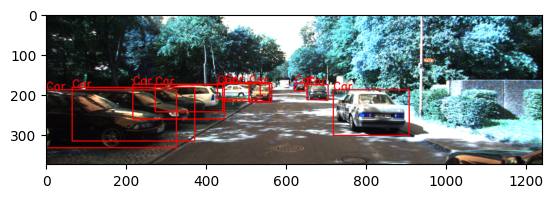

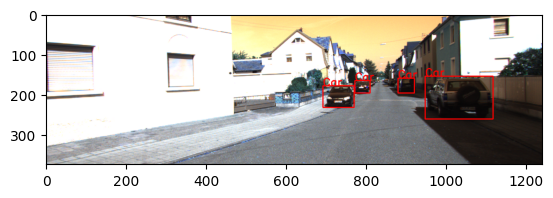

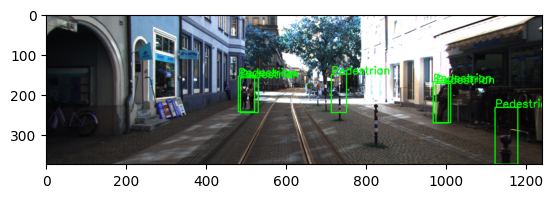

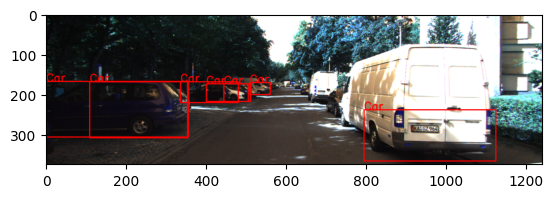

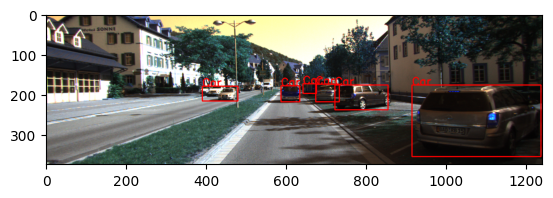

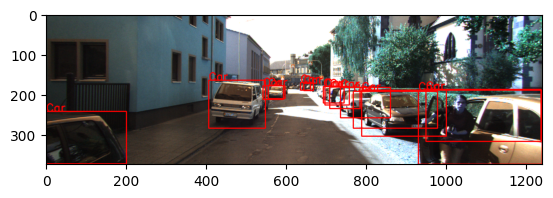

Avg inference speed (ms/img): 4.428164499995546


In [51]:
from string import Template
# -------- RUN INFERENCE AND PLOT SAMPLE OUTPUTS --------
#TO-DO: Add the code to run inference and visualize the outputs results

img_paths = glob.glob(os.path.join(TEST_IMG, "*.png"))
res = model(img_paths)

label_to_colour = {
    0: (255, 0, 0), # Car
    1: (0, 255, 0), # Pedestrian
    2: (0, 0, 255), # Cyclist
}

# Plot the squares on the images
avg_speed = 0
for i, img_path in enumerate(img_paths):
  img = cv2.imread(img_path)
  for box in res[i].boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    col = label_to_colour[box.cls[0].item()]
    cv2.rectangle(img, (x1, y1), (x2, y2), col, 2)
    cv2.putText(img, res[i].names[box.cls[0].item()], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, col, 2)
  plt.imshow(img)
  plt.show()
  avg_speed += res[i].speed['inference']

avg_speed /= len(img_paths)
print("Avg inference speed (ms/img):",  res[i].speed['inference'])



## Question

Comment on the performance of the model based on the visualizations you made and discuss the inference speed versus performance for YOLO on the driving datasets. Do you think we can use YOLO online on autonomous cars?

## Ans